In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_training_data(DATADIR,CATEGORIES):
    l = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(image_array, (60,60))
                l.append([new_array, class_num])
            except Exception as e:
                pass
    return(l)

data_dir_train = '/home/ujaan/Desktop/Assignments/Image_2/Input/Dataset/train/'
categories = ['category 1','category 2','category 3','category 4']
training_data = create_training_data(data_dir_train, categories)
print(len(training_data))

440


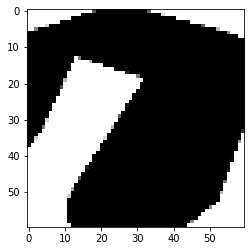

In [3]:
plt.imshow(training_data[75][0], cmap='gray')
plt.show()

In [4]:
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])

0
3
3
1
3


In [5]:
X_train = []
y_train = []

for features, lebel in training_data:
    X_train.append(features)
    y_train.append(lebel)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
def create_testing_data(DATADIR):
    l = []
    for image in os.listdir(DATADIR):
        try:
            image_array = cv2.imread(os.path.join(DATADIR, image), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(image_array, (60,60))
            l.append(new_array)
        except Exception as e:
            pass
    return(l)

data_dir_test = '/home/ujaan/Desktop/Assignments/Image_2/Input/Dataset/test/'
testing_data = create_testing_data(data_dir_test)
print(len(testing_data))

30


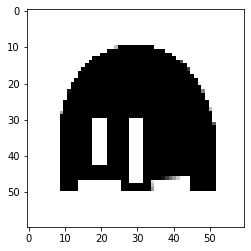

In [18]:
plt.imshow(testing_data[28], cmap='gray')
plt.show()

In [9]:
X_test = np.array(testing_data)

In [14]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
440/440 [==============================] - 0s 403us/sample - loss: 1.0985 - acc: 0.5432
Epoch 2/10
440/440 [==============================] - 0s 243us/sample - loss: 0.6889 - acc: 0.7545
Epoch 3/10
440/440 [==============================] - 0s 255us/sample - loss: 0.5491 - acc: 0.8136
Epoch 4/10
440/440 [==============================] - 0s 264us/sample - loss: 0.4405 - acc: 0.8636
Epoch 5/10
440/440 [==============================] - 0s 256us/sample - loss: 0.3801 - acc: 0.9000
Epoch 6/10
440/440 [==============================] - 0s 256us/sample - loss: 0.3251 - acc: 0.9227
Epoch 7/10
440/440 [==============================] - 0s 250us/sample - loss: 0.3013 - acc: 0.9159
Epoch 8/10
440/440 [==============================] - 0s 250us/sample - loss: 0.2641 - acc: 0.9295
Epoch 9/10
440/440 [==============================] - 0s 236us/sample - loss: 0.2285 - acc: 0.9500
Epoch 10/10
440/440 [==============================] - 0s 253us/sample - loss: 0.1963 - acc: 0.9636


In [15]:
predictions = model.predict([X_test],verbose=1)
l = []
for i in range(0,len(predictions)):
    l.append(np.argmax(predictions[i]))
predictions = np.array(l)
print(predictions)

30/30 [==============================] - 0s 912us/sample
[2 2 3 0 0 1 1 1 1 2 0 3 2 2 3 2 3 0 0 3 2 2 2 2 2 1 1 3 2 3]


In [16]:
predictions = predictions+1

In [17]:
result = pd.DataFrame(predictions)
result

,0
0,3
1,3
2,4
3,1
4,1
5,2
6,2
7,2
8,2
9,3
